시퀀스 데이터 처리하는 기본적인 딥러닝 모델: **순환 신경망**, **1D 컨브넷**

- 문서 분류나 시계열 분류 (글의 주제나 책의 저자 식별하기)
- 시계열 비교 (두 문서나 두 주식 가격이 얼마나 밀접하게 관련 있는지 추정하기)
- 시퀀스-투-시퀀스 학습 (영어 문장을 프랑스어로 변환하기)
- 감성 분석 (트윗이나 영화 리뷰가 긍정적인지 부정적인지 분류하기)
- 시계열 예측 (어떤 지역의 최근 날씨 데이터가 주어졌을 때 향후 날씨 분석하기)

<br/>

## 6.1 텍스트 데이터 다루기

자연어 처리를 위한 딥러닝: 단어, 문장, 문단에 적용한 패턴 인식   
                           텍스트 원본을 입력으로 사용하지 못함

텍스트 벡터화
- 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환함
- 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환함
- 텍스트에서 단어나 문자의 n-그램을 추출해 각 n-그램을 하나의 벡터로 변환함   
        n-그램은 연속된 단어나 문자의 그룸으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출함
        
토큰: 텍스트를 나누는 단위 (단어, 문자, n-그램)   
토큰화: 텍스트를 토큰으로 나누는 작업

모든 텍스트 벡터화 작업은 어떤 종류의 토큰화를 적용하고 생성된 토큰에 수치형 벡터를 연결하는 것으로 이뤄짐

토큰과 벡터를 연결하는 방법
- 토큰의 원-핫 인코딩
- 토큰 임베딩 (일반적으로 단어에만 사용돼서 단어 임베딩이라고도 부름)

- n-그램   
        문장에서 추출한 N개의 연속된 단어(또는 문자)
- Bow (Bag-of-Words)
        n-그램을 사용해 추출한 토큰은 특정한 순서가 없는데 이것을 BoW라고 함
        딥러닝 모델보다 얕은 학습 방법의 언어 처리 모델에 사용되는 경향이 있음
        

#### 6.1.1 단어와 문자의 원-핫 인코딩

원-핫 인코딩: 토큰을 벡터로 변환하는 가장 일반적이고 기본적인 방법

모든 단어에 고유한 정수 인덱스 부여, 이 정수 인덱스 i를 크기가 N인 이진 벡터로 변환 (이 벡터는 i번째 원소만 1, 나머지는 0)

In [2]:
#단어 수준의 원-핫 인코딩

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homewrok.']
#초기 데이터, 각 원소가 샘플임(예시에서는 하나의 샘플이 하나의 문장(문서 전체가 될 수도 있음))

token_index ={} #데이터에 있는 모든 토큰의 인덱스를 구축함

for sample in samples:
    for word in sample.split(): #split() 메서드를 사용해 샘플을 토큰으로 나눔, 실전에서는 구두점과 특수 문자도 사용함
        if word not in token_index:
            token_index[word] = len(token_index) +1 #단어마다 고유한 인덱스를 할당함, 인덱스 0은 사용x
            
max_length = 10 #샘플을 벡터로 변환함, 각 샘플에서 max_length까지 단어만 사용함

results = np.zeros(shape = (len(samples), max_length, max(token_index.values())+1)) #결과를 저장할 배열

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i,j,index] =1.

In [3]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homewrok.']
characters = string.printable #출력 가능한 모든 아스키 문자

token_index = dict(zip(characters, range(1, len(characters)+1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i,j,index] =1.

In [20]:
#케라스를 사용한 단어 수준의 원-핫 인코딩하기

from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homewrok.']

tokenizer = Tokenizer(num_words=1000) #가장 빈도가 높은 1000개 단어만 선택하도록 Tokenizer 객체를 만듬
tokenizer.fit_on_texts(samples) #단어 인덱스 구축

sequences = tokenizer.texts_to_sequences(samples) #문자열을 정수 인덱스의 리스트로 변환

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
#직접 원-핫 이진 벡터 표현을 얻을 수 있음, 원-핫 인코딩 외에 다른 벡터화 방법들도 제공함

word_index = tokenizer.word_index #계산된 단어 인덱스를 구함
print(len(word_index),'개의 고유한 토큰을 찾았습니다')

9 개의 고유한 토큰을 찾았습니다


원-핫 해싱   

        원-핫 인코딩의 변종 중 하나   
        어휘 사전에 있는 고유한 토큰의 수가 너무 커퍼 모두 다루기 어려울 때 사용
        각 단어에 명시적으로 인덱스 할당, 인덱스를 딕셔너리에 저장하는 대신 단어를 해싱해 고정된 크기의 벡터로 변환   
        일반적으로 간단한 해싱 함수를 사용함   
        명시적인 단어 인덱스가 필요 없어 메모리 절약, 온라인 방식으로 데이터 인코딩 가능   
        해시 충돌이 일어날 수 있음

In [21]:
#해싱 기법을 사용한 단어 수준의 원-핫 인코딩하기

samples = ['The cat sat on the mat.', 'The dog ate my homewrok.']

dimensionality = 1000 
#단어를 크기가 1000인 벡터로 저장함, 1000개(나 그 이상)의 단어가 있으면 해싱 충돌 늘어나고 인코딩 정확도 감소될 것

max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in enumerate(samples):
        index = abs(hash(word)) % dimensionality #단어를 해싱해 0과 1000 사이의 랜덤한 정수 인덱스로 변환함
        results[i,j,index] =1.

#### 6.1.2 단어 임베딩 사용하기

단어 임베딩: 

        밀집 단어 벡터   
        단어와 벡터를 연관 짓는 강력하고 인기 있는 방법
             
|원 핫 인코딩|단어 임베딩|
|:---:|:---:|
|희소 벡터(대부분 0으로 채워짐)|밀집 벡터|
|고차원(어휘 사전에 있는 단어의 수와 차원이 같음|저차원의 실수형 벡터|
|수동 인코딩|데이터로부터 학습됨|

임베딩이 더 많은 정보를 적은 차원에 저장함

단어 임베딩 만드는 방법
- 관심 대상인 문제(문서 분류나 감성 예측 등)와 함께 단어 임베딩을 학습함
  랜덤한 단어 벡터로 시작해 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습함
- 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드함 (사전 훈련된 단어 임베딩)

<br/>
<br/>

**Embedding 층을 사용해 단어 임베딩 학습하기**

단어 임베딩

        언어를 기하학적 공간에 매핑하는 것   
        두 단어 벡터 사이의 거리(L2 거리)는 단어 사이의 의미 거리와 관계되어 있음   
        임베딩 공간의 특정 방향도 의미 가질 수 있음   
            ex) king 벡터에 female 벡터 더하면 queen 벡터가 됨   
        좋은 단어 임베딩 공간 만드는 것은 문제에 따라 크게 달라짐   
        새로운 작업에는 새로운 임베딩 학습하는 것이 좋음
        

In [1]:
#Embedding 층의 객체 생성하기
from keras.layers import Embedding

embedding_layer = Embedding(1000,64)
#Embedding 층은 적어도 2개의 매개변수를 받음
#가능한 토큰의 개수(여기서는 1000 (단어 인덱스 최댓값 +1)), 임베딩 차원(여기서는 64)

Embedding 층(특정 단어 나타내는)을 정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것이 좋음   
정수를 입력 받아 내부 딕셔너리에서 이 정수에 연관된 벡터를 찾아 반환함   

![Embedding 층](https://blog.kakaocdn.net/dn/orr1S/btqxgXk1HE6/vPwNKlfir4BfUHnPdaIEi1/img.png)

Embedding 층은 크기가 (samples, sequence_length)인 2D 정수 텐서를 입력으로 받음   
각 샘플은 정수의 시퀀스

        Embedding 층에 (32,10) 크기의 배치 주입 가능   
        길이가 10인 시퀀스 32개로 이루어진 배치
        
배치에 있는 모든 시퀀스의 길이는 같아야 해서 (하나의 텐서에 담아야 해서) 작은 길이의 시퀀스는 0으로 패딩, 길이가 긴 시퀀스는 잘림

Embedding 층은 크기가 (samples, sequence_length, embedding_dimensionality)인 3D 실수형 텐서를 반환   
3D 텐서는 RNN 층이나 1D 합성곱 층에서 처리됨

Embedding 층의 객체 생성할 때 가중치는 랜덤하게 초기화됨   
역전파 통해 점차 조정되어 이어지는 모델이 사용할 수 있게 임베딩 공간 구성함   
훈련 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 많이 가지게 됨

In [2]:
#Embedding 층에 사용할 IMDB 데이터 로드

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #특성으로 사용할 단어의 수
maxlen = 20 #사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) #정수 리스트로 데이터 로드

#리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환함
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [3]:
#IMDB 데이터에 Embedding 층과 분류기 사용하기

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=maxlen))
#나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 저장함
#Embedding 층의 출력 크기는 (samples, maxlen, 8)이 됨

model.add(Flatten()) #3D 임베딩 텐서를 (samples, maxlen*8) 크기의 2D 텐서로 펼침

model.add(Dense(1,activation='sigmoid')) #분류기를 추가함
model.compile(optimizer = 'rmsprop', loss ='binary_crossentropy', metrics =['acc'])
model.summary()

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6660 - acc: 0.6306 - val_loss: 0.6181 - val_acc: 0.6910
Epoch 2/10
625/625 [==============================] - 0s 777us/step - loss: 0.5418 - acc: 0.7499 - val_loss: 0.5294 - val_acc: 0.7274
Epoch 3/10
625/625 [==============================] - 1s 897us/step - loss: 0.4626 - acc: 0.7867 - val_loss: 0.5037 

임베딩 시퀀스를 펼치고 하나의 Dense 층을 훈련해서 입력 시퀀스에 있는 각 단어를 독립적으로 다룸   
단어 사이의 관계나 문장 구조를 고려하지 않았음   
각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층 위에 순환 층이나 1D 합성곱 층을 추가하는 것이 좋음

<br/>

**사전 훈련된 단어 임베딩 사용하기**

훈련 데이터가 부족하면 작업에 맞는 단어 임베딩을 학습할 수 없음   
미리 계산된 임베딩 공간에서 임베딩 벡터를 로드할 수 있음   
이런 임베딩 공간은 뛰어난 구조와 유용한 성질을 가지고 있어 언어 구조의 일반적인 측면을 잡아낼 수 있음

단어 임베딩은 일반적으로 단어 출현 통계를 사용해 계산됨

Word2vec 알고리즘   
가장 유명하고 성공적인 단어 임베딩 방법   
성별처럼 구체적인 의미가 있는 속성을 잡아냄

GloVe   
단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법 사용

<br/>

#### 6.1.3 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지

먼저 원본 IMDB 데이터셋을 http://mng.bz/0tIo 에서 내려받고 압축 해제

In [7]:
#IMDB 원본 데이터 전처리하기

import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding = "utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)



In [23]:
#IMDB 원본 데이터의 텍스트를 토큰화하기

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 #100개 단어 이휴는 버림
training_samples = 200 #훈련 샘플은 200개
validation_samples = 10000 #검증 샘플은 10000개
max_words = 10000 #데이터셋에서 가장 빈도 높은 10000개의 단어만 사용

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index),'개의 고유한 토큰을 찾았습니다')

data = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기:',data.shape)
print('레이블 텐서의 크기:',labels.shape)

indices = np.arange(data.shape[0]) #데이터를 훈련 세트와 검증 세트로 분할, 샘플이 순서대로 있어서 먼저 데이터 섞음
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples+validation_samples]


88582 개의 고유한 토큰을 찾았습니다
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


GloVe 단어 임베딩 내려받기

https://nlp.stanford.edu/projects/glove 에서 2014년 영문 위키피디아를 사용해 사전에 계산된 임베딩 내려받음   
파일 이름은 glove.6B.zip   
40만 개의 단어(또는 토큰)에 대한 100차원의 임베딩 벡터 포함하고 있음

In [24]:
#임베딩 전처리
#GloVe 단어 임베딩 파일 파싱하기
#압축 해제한 파일을 파싱해 단어(문자열)와 이에 상응하는 벡터 표현(숫자 벡터)을 매핑하는 인덱스를 만듬

glove_dir = './datasets/'

embeddings_index = {}
f=open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding = "utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index), '개의 단어 벡터를 찾았습니다')

400000 개의 단어 벡터를 찾았습니다


In [25]:
#Embedding 층에 주입할 수 있도록 임베딩 행렬을 만듬 (행렬 크기는 (max_words, embedding_dim))
#행렬의 i번째 원소는 단어 인덱스의 i번째 단어에 상응하는 embedding_dim 차원 벡터

#GloVe 단어 임베딩 행렬 준비하기
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i<max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector #임베딩 인덱스에 없는 단어는 모두 0이 됨

In [26]:
#모델 정의하기

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [27]:
#모델에 GloVe 임베딩 로드하기
#사전 훈련된 단어 임베딩을 Embedding 층에 로드하기

model.layers[0].set_weights([embedding_matrix]) #모델의 첫 번째 층에 준비된 GloVe 행렬을 만듬
model.layers[0].trainable = False #Embedding 층 동결
#모델 일부는 사전 훈련되고 다른 부분은 랜덤하게 초기화됐다면 훈련하는 동안 사전 훈련된 부분이 업데이트되면 안됨 -> 동결

In [28]:
#모델 훈련과 평가
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train,y_train,
                    epochs =10, 
                    batch_size = 32, 
                    validation_data=(x_val,y_val))

model.save_weights('pre_trained_glove_model.h5')                    

Epoch 1/10
7/7 [==============================] - 1s 72ms/step - loss: 1.6954 - acc: 0.5100 - val_loss: 0.7735 - val_acc: 0.4923
Epoch 2/10
7/7 [==============================] - 0s 55ms/step - loss: 0.6091 - acc: 0.6300 - val_loss: 1.2645 - val_acc: 0.4926
Epoch 3/10
7/7 [==============================] - 0s 48ms/step - loss: 0.6330 - acc: 0.6550 - val_loss: 0.7289 - val_acc: 0.4904
Epoch 4/10
7/7 [==============================] - 0s 46ms/step - loss: 0.4199 - acc: 0.7900 - val_loss: 0.7869 - val_acc: 0.5089
Epoch 5/10
7/7 [==============================] - 0s 46ms/step - loss: 0.2844 - acc: 0.8850 - val_loss: 0.7589 - val_acc: 0.5108
Epoch 6/10
7/7 [==============================] - 0s 45ms/step - loss: 0.3398 - acc: 0.8300 - val_loss: 1.8400 - val_acc: 0.4926
Epoch 7/10
7/7 [==============================] - 0s 46ms/step - loss: 0.1937 - acc: 0.9450 - val_loss: 0.8365 - val_acc: 0.4966
Epoch 8/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0521 - acc: 1.0000 - val

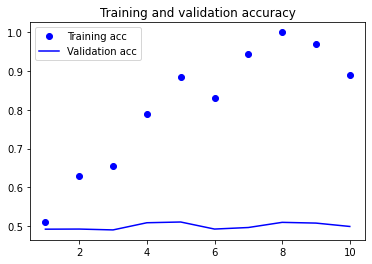

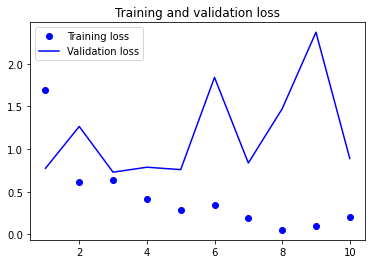

In [30]:
#결과 그래프 그리기

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
#사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련하기

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 73ms/step - loss: 0.6937 - acc: 0.4650 - val_loss: 0.7023 - val_acc: 0.5015
Epoch 2/10
7/7 [==============================] - 0s 62ms/step - loss: 0.4965 - acc: 0.9700 - val_loss: 0.7139 - 

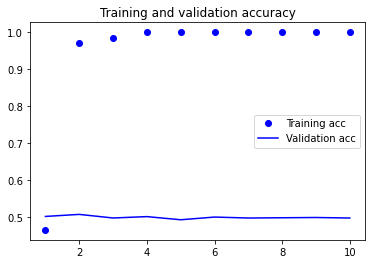

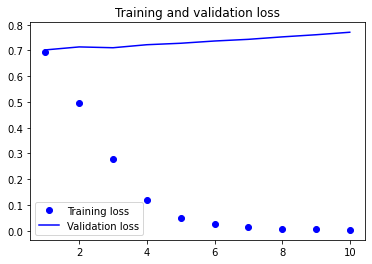

In [32]:
#결과 그래프 그리기

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
#테스트 데이터 토큰화하기
#테스트 데이터에서 모델 평가하기 전 테스트 데이터를 토큰화해야함

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen = maxlen)
y_test = np.asarray(labels)

In [34]:
#테스트 세트에서 모델 평가하기

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.9398 - acc: 0.4745


[0.9398255348205566, 0.4745199978351593]

## 6.2 순환 신경망 이해하기

피드포워드 네트워크

        완전 연결 신경망, 합성곱 신경망을 포함함   
        메모리가 없어서 시퀀스나 시계열 데이터 포인트 처리하려면 네트워크에 전체 시퀀스를 주입해야 함
        
순환 신경망

        이전에 나온 것을 기억하면서 들어오는 만큼씩 처리해 문장에 있는 의미를 자연스럽게 표현하도록 도와줌
        과거 정보를 사용해 구축되며 새롭게 얻은 정보를 계속 업데이트함
        시퀀스의 원소 순회하면서 지금까지 처리한 정보를 상태(state)에 저장함   
        
        RNN은 내부에 루프(loop)를 가진 신경망의 한 종류   
        RNN의 상태는 2개의 다른 시퀀스를 처리하는 사이에 재설정됨   
        하나의 시퀀스가 하나의 데이터 포인트로 간주됨 (네트워크에 하나의 입력을 주입한다고 가정)   
        데이터 포인트가 한 번에 처리되지 않고 네트워크는 시퀀스의 원소를 차례로 방문함
        
RNN은 크기가 (timesteps, input_features)인 2D 텐서로 인코딩된 벡터의 시퀀스를 입력받음   
시퀀스는 타임스텝을 따라 반복됨   
각 타임스텝 t에서 현재 상태와 ((input_features, ) 크기의) 입력을 연결해 출력 계산하고 다음 스텝의 상태로 설정   
첫 번째 타임스탭에서는 네트워크의 초기 상태인 0 벡터로 상태 초기화

**의사코드로 표현한 RNN**
```
state_t = 0 #타임스텝 t의 상태
for input_t in input_sequence: #시퀀스의 원소 반복
    output_t = f(input_t, state_t)
    state_t = output_t #출력은 다음 반복을 위한 상태가 됨
```    

f함수는 입력과 상태를 출력으로 변환하는데 2개의 행렬 W와 U, 편향 벡터를 사용하는 변환으로 바꿀 수 있음


**더 자세한 의사 코드로 표현한 RNN**
```
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W,input_t) + dot(U, state_t) + b)
    state_t = output_t
```   

In [35]:
#넘파이로 구현한 간단한 RNN

import numpy as np

timesteps = 100 #입력 시퀀스에 있는 타임스텝의 수
input_features = 32 #입력 특성의 차원
output_features = 64 #출력 특성의 차원

inputs = np.random.random((timesteps, input_features)) #입력 데이터: 예제를 위해 생성한 난수

state_t = np.zeros((output_features,)) #초기 상태: 모두 0인 벡터

#랜덤한 가중치 행렬을 만듬
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []
for input_t in inputs: #input_t는 크기가 (input_features, )인 벡터
    output_t = np.tanh(np.dot(W, input_t)+np.dot(U,state_t)+b) #입력과 현재 상태(이전 출력)을 연결해 현재 출력을 얻음
    successive_outputs.append(output_t) #이 출력을 리스트에 저장함
    state_t = output_t #다음 타임스텝을 위해 네트워크의 상태를 업데이트함
    
final_output_sequence = np.stack(successive_outputs, axis = 0) #최종 출력은 크기가 (timesteps, output_features)인 2D 텐서

#요약하면 RNN은 반복할 때 이전에 계산한 정보를 재사용하는 for 루프에 지나지 않음
#RNN은 스텝 함수에 의해 특화됨

#### 6.2.1 케라스의 순환 층

위에서 넘파이로 간단히 구현한 과정이 실제 케라스의 SimpleRNN 층에 해당됨

다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 한다는 것   
(batch_size, timesteps, input_features) 크기의 입력을 받음

```
from keras.layers import SimpleRNN
```

SimpleRNN은 두 가지 모드로 실행 가능
1. 각 타임스텝의 출력을 모은 전체 시퀀스 반환 (크기가 (batch_size, timesteps, output_features)인 3D 텐서)
2. 입력 시퀀스에 대한 마지막 출력만 반환 (크기가 (batch_size, output_features)인 2D 텐서)

객체 생성할 때 return_sequences 매개변수로 선택 가능

In [36]:
#마지막 타임스텝의 출력만 얻는 예제

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model. summary()

#전체 상태 시퀀스 반환
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences = True))
model.summary()

#네트워크의 표현력 증가시키기 위해 여러 개의 순환 층 차례로 쌓는 것이 유용할 때가 있음
#중간층들이 전체 출력 시퀀스를 반환하도록 설정해야 함

model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) #맨 위 층만 마지막 출력을 반환
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7

In [37]:
#IMDB 데이터 전처리하기

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 #특성으로 사용할 단어의 수
maxlen = 500 #사용할 텍스트의 길이(가장 빈번한 max_features개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test),'테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [38]:
#Embedding 층과 SimpleRNN 층을 사용한 모델 훈련하기

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics =['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size = 128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 97ms/step - loss: 0.5933 - acc: 0.6742 - val_loss: 0.5316 - val_acc: 0.7366
Epoch 2/10
157/157 [==============================] - 18s 115ms/step - loss: 0.3760 - acc: 0.8432 - val_loss: 0.3974 - val_acc: 0.8280
Epoch 3/10
157/157 [==============================] - 17s 106ms/step - loss: 0.2800 - acc: 0.8916 - val_loss: 0.3614 - val_acc: 0.8460
Epoch 4/10
157/157 [==============================] - 17s 106ms/step - loss: 0.2159 - acc: 0.9191 - val_loss: 0.3400 - val_acc: 0.8724
Epoch 5/10
157/157 [==============================] - 20s 126ms/step - loss: 0.1560 - acc: 0.9427 - val_loss: 0.3721 - val_acc: 0.8588
Epoch 6/10
157/157 [==============================] - 20s 126ms/step - loss: 0.1057 - acc: 0.9641 - val_loss: 0.4070 - val_acc: 0.8670
Epoch 7/10
157/157 [==============================] - 18s 117ms/step - loss: 0.0696 - acc: 0.9777 - val_loss: 0.5144 - val_acc: 0.8180
Epoch 8/10
157/157 [==============================] - 25

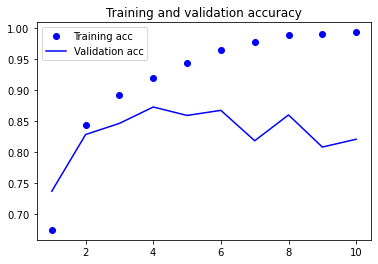

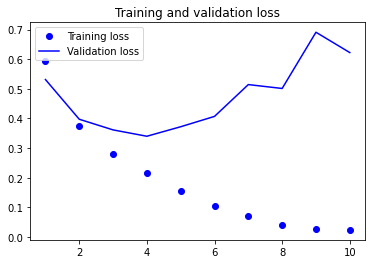

In [39]:
#결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

RNN은 기준 모델보다 얻은 정보가 적어서 전의 모델보다 성능 좋지 않음   
SimpleRNN이 텍스트처럼 긴 시퀀스 처리하는 데 적합하지 않음

#### 6.2.2 LSTM과 GRU 층 이해하기

실전에서는 SimpleRNN이 너무 단순해 거의 항상 LSTM과 GRU 순환 층을 사용할 것   

SimpleRNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있음   
실제로는 긴 시간에 걸친 의존성은 학습할 수 없는 것이 문제 (그래디언트 소실 문제 때문에)   
피드포워드 네트워크에 층 많이 추가할수록 훈련하기 어려운 것과 같음   
이 문제를 해결하기 위해 고안된 것이 LSTM과 GRU 층

LSTM층 (장,단기 메모리 알고리즘 (Long Shot-Term Memory, LSTM))   

        그래디언트 소실 문제에 대한 연구의 결정체   
        SimpleRNN의 변종   
        정보를 여러 타임스텝에 걸쳐 나르는 방법이 추가됨 (컨베이어 벨트처럼)   
        나중을 위해 정보를 저장해 처리 과정에서 오래된 시그널이 점차 소실되는 것을 막아줌

가중치 행렬 여러 개가 나와서 출력을 나타내는 문자 o로 셀에 있는 W와 U 행렬 표현 (Wo, Uo)   
타임스텝을 가로질러 정보를 나르는 데이터 흐름 추가 (타임스텝 t에서 이 값을 이동상태 c_t라고 부름 (c는 이동))   
입력 연결과 순환 연결(상태)로부터 이 정보가 합성됨 (가중치 행렬과 점곱, 편향 더하고 활성화 함수 적용 (완전 연결 층과 같은 변환))   
다음 타임스텝으로 전달될 상태를 활성화 함수와 곱셈을 통해 변경시킴   

데이터 흐름에서 다음 이동 상태(c_t+1)가 계산되는 방식   
3개의 다른 변환이 관련되어 있는데 3개 모두 SimpleRNN과 같은 형태를 가짐

```
y = activation(dot(state_t,U) + dot(input_t, W) + b)
```
3개의 변환 모두 자신만의 가중치 행렬을 가짐 (각각 i,f,k)

**LSTM 구조의 의사코드**
```
output_t = activation(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wi) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wi) + bk)

#i_t, f_t, k_t를 결합해 새로운 이동 상태 (c_t+1)을 구함
c_t + 1 = i_t * k_t + c_t * f_t
```

![LSTM 구조](https://user-images.githubusercontent.com/27988544/65310734-ee093100-dbc9-11e9-9e6d-590767ccd741.jpg)


c_t와 f_t의 곱셈: 이동을 위한 데이터 흐름에서 관련 적은 정보를 의도적으로 삭제   
i_t, k_t: 현재에 대한 정보를ㅈ ㅔ공하고 이동 트랙을 새로운 정보로 업데이트

이렇게 해석하는 것은 큰 의미 X   
연산들이 실제로 하는 일은 연산에 관련된 가중치 행렬에 따라 결정됨   
가중치는 엔드-투-엔드 방식으로 학습됨   
훈련 반복마다 매번 새로 시작돼서 연산들에 특정 목적을 부여하기가 불가능함

RNN 셀을 구성하는 연산 조합은 엔지니어링적인 설계가 아니라 가설 공간의 제약 조건으로 해석하는 것이 나음

#### 6.2.3 케라스를 사용한 LSTM 예제

LSTM 층으로 모델 구성, IMDB 데이터에서 훈련   
LSTM 층은 출력 차원만 지정하고 다른 매개변수는 케라스의 기본값으로 남겨둠   

케라스는 좋은 기본값을 가지고 있어 직접 매개변수를 튜닝하는 데 시간 안써도 거의 항상 어느 정도 작동하는 모델 얻을 수 있음

In [43]:
#케라스에서 LSTM 층 사용하기
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics = ['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 31s 196ms/step - loss: 0.5265 - acc: 0.7581 - val_loss: 0.4610 - val_acc: 0.7812
Epoch 2/10
157/157 [==============================] - 34s 217ms/step - loss: 0.3039 - acc: 0.8814 - val_loss: 0.2931 - val_acc: 0.8814
Epoch 3/10
157/157 [==============================] - 34s 218ms/step - loss: 0.2369 - acc: 0.9107 - val_loss: 0.2890 - val_acc: 0.8806
Epoch 4/10
157/157 [==============================] - 36s 227ms/step - loss: 0.2023 - acc: 0.9270 - val_loss: 0.3135 - val_acc: 0.8674
Epoch 5/10
157/157 [==============================] - 34s 219ms/step - loss: 0.1767 - acc: 0.9360 - val_loss: 0.2890 - val_acc: 0.8858
Epoch 6/10
157/157 [==============================] - 34s 219ms/step - loss: 0.1555 - acc: 0.9451 - val_loss: 0.4895 - val_acc: 0.8098
Epoch 7/10
157/157 [==============================] - 35s 220ms/step - loss: 0.1505 - acc: 0.9446 - val_loss: 0.3652 - val_acc: 0.8830
Epoch 8/10
157/157 [==============================] - 3

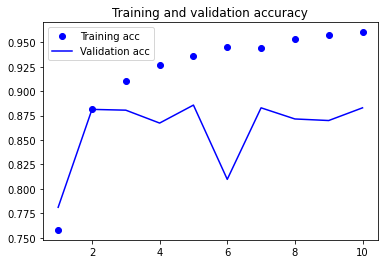

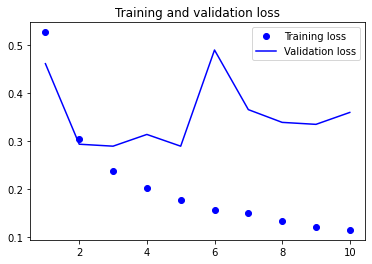

In [44]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

LSTM이 그래디언트 소실 문제로부터 영향을 덜 받아서 결과도 SimpleRNN보다 더 나음

LSTM 성능이 획기적으로 더 높지 않은 이유   
1. 임베딩 차원이나 LSTM 출력 차원 같은 하이퍼파라미터를 전혀 튜닝하지 않았기 때문
2. 규제가 없기 때문
3. 리뷰를 전체적으로 길게 분석하는 것(LSTM이 잘 하는 일)은 감성 분류 문제에 도움이 되지 않기 때문

감성 분류 문제와 같이 간단한 문제는 각 리뷰에 어떤 단어가 나타나고 얼마나 등장하는지 보는 것이 나음   
-> 첫 번째 완전 연결 네트워크가 사용한 방법

복잡한 자연어 처리 문제들에서는 LSTM 능력이 드러남 (질문-응답, 기계 번역 분야)

## 6.3 순환 신경망의 고급 사용법

온도 예측 문제   
시계열 데이터는 건물 옥상에 설치된 센서에서 취득한 온도, 기압, 습도 같은 데이터   
마지막 데이터 포인터에서 24시간 이후의 온도 예측   

이 문제는 시계열 데이터에서 일반적으로 나타나는 여러 가지 어려운 점 가지고 있음

적용할 기법들
- 순환 드롭아웃   
        순환 층에서 과대적합 방지 위해 케라스에 내장되어 있는 드롭아웃 사용
- 스태킹 순환 층   
        네트워크의 표현 능력을 증가시킴 (대신 계산 비용이 많이 듬)
- 양방향 순환 층   
        순환 네트워크에 같은 정보를 다른 방향으로 주입해 정확도 높이고 기억을 좀 더 오래 유지시킴
        
        
#### 6.3.1 기온 예측 문제

날씨 시계열 데이터셋 사용   
최근 데이터(몇 이치 데이터 포인트)를 입력으로 사용해 모델 만들고 24시간 이후의 기온 예측

In [46]:
#예나의 날씨 데이터셋 조사하기

import os

data_dir = './datasets/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [49]:
#데이터 파싱하기
#42만 551개의 데이터 전체를 넘파이 배열로 바꿈

import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))

for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i,:] = values

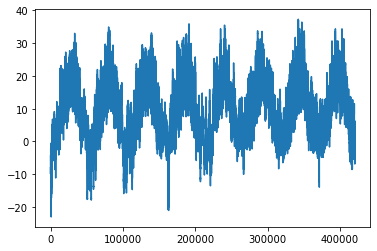

In [50]:
#시계열 온도 그래프 그리기
from matplotlib import pyplot as plt

temp = float_data[:,1] #온도 (섭씨)
plt.plot(range(len(temp)),temp)

#온도에 주기성 있다는 것을 잘 볼 수 있음

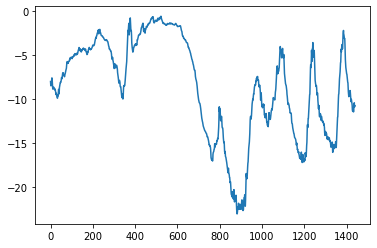

In [52]:
#처음 10일 간 온도 그래프 그리기
plt.plot(range(1440),temp[:1440])

#일별 주기성 볼 수 있음   
#데이터는 아주 추운 겨울 중 10일

#### 6.3.2 데이터 준비

이 문제의 정확한 정의   
lookback 타임스텝(하나의 타임스텝은 10분)만큼 이전으로 돌아가서 매 steps 타임스텝마다 샘플링   
이 데이터를 바탕으로 delay 타임스텝 이후 온도 예측 

사용할 변수
- lookback = 1440 : 10일 전 데이터로 돌아감
- steps = 6 : 1시간마다 데이터 포인트 하나를 샘플링함
- delay = 144 : 24시간이 지난 데이터가 타깃이 됨

시작 전 처리할 두 가지 작업
- 신경망에 주입할 수 있는 형태로 데이터 전처리하기   
        데이터가 이미 수치형이어서 추가적인 벡터화는 필요 없음   
        데이터에 있는 각 시계열 특성의 범위가 서로 다름 (온도는 일반적으로 -20~30, 밀리바로 측정된 기압은 1000 근처의 값)   
        각 시계열 특성을 개별적으로 정규화해 비슷한 범위 가진 작은 값으로 바꿈
- float_data 배열을 받아 과거 데이터의 배치와 미래 타깃 온도를 추출하는 파이썬 제너레이터를 만듬   
        이 데이터셋에 있는 샘플은 중복이 많아서 모든 샘플을 각기 메모리에 적제하는 것은 낭비가 심함   
        원본 데이터를 사용해 그때그때 배치를 만듬

In [53]:
#데이터 정규화하기
#각 시계열 특성에 대해 평균 빼고 표준편차로 나눠 전처리

mean = float_data[:200000].mean(axis = 0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

제너레이터 함수
        (samples, targets) 튜플을 반복적으로 반환   
        samples은 입력 데이터로 사용할 배치, targets 은 이에 대응되는 타깃 온도의 배열
        
제너레이터 함수의 매개변수
- data : 정규화한 부동 소수 데이터로 이뤄진 원본 배열
- lookback : 입력으로 사용하기 위해 거슬러 올라갈 타임스텝
- delay : 타깃으로 사용할 미래의 타임스텝
- min_index, max_index : 추출할 타임스텝의 범위를 지정하기 위한 data 배열의 인덱스, 검증/텍스트 데이터 분리하는 데 사용
- shuffle : 샘플을 섞을지, 시간 순서대로 추출할지 결정
- batch_size : 배치의 샘플 수
- step : 데이터를 샘플링할 타임스텝 간격 (1시간에 하나의 데이터 포인트 추출 위해 6으로 지정)

In [71]:
#시계열 데이터와 타깃 반환하는 제너레이터 함수

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [72]:
#훈련, 검증, 테스트 제너레이터 준비하기
#각 제너레이터는 원본 데이터에서 다른 시간대 사용
#훈련은 처음 20만개, 검증은 그다음 10만개, 테스트는 나머지
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

#### 6.3.3 상식 수준의 기준점

간단한 상식 수준의 해법 시도   
정상 여부 확인을 위한 용도, 고수준 머신 러닝 모델이라면 뛰어넘어야 할 기준점을 만듬   
해결책 없는 새로운 문제 다뤄야 할 때 유용함

이 문제의 경우 온도 시계열 데이터는 연속성 있고 일자별로 주기성 가진다고 가정할 수 있음   
상식 수준의 해결책은 지금으로부터 24시간 후 온도는 지금과 동일하다고 예측하는 것

평균 절댓값 오차(MAE)로 평가
```
np.mean(np.abs(preds - targets))
```

In [73]:
#평가 위한 반복 루프
#상식적인 기준 모델의 MAE 계산하기

def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

#MAE를 섭씨 단위로 변환하기
celisius_mae = 0.29 * std[1]

0.2897359729905486


#### 6.3.4 기본적인 머신 러닝 방법

RNN처럼 복잡하고 연산 비용 많이 드는 모델 시도 전에 간단하고 손쉽게 만들 수 있는 머신 러닝 모델 먼저 만드는 것이 좋음

다음은 데이터를 펼쳐 2개의 Dense 층을 통과시키는 완전 연결 네트워크   
전형적인 회귀 문제여서 마지막 Dense 층에 활성화 함수 두지 않음   
손실 함수는 MAE   
상식 수준의 방법에서 사용한 것과 동일한 데이터, 지표 사용해서 결과 바로 비교 가능함

In [74]:
#완전 연결 모델 훈련하고 평가하기

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape = (lookback//step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer = RMSprop(), loss = 'mae')

history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                             epochs = 20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 12s 24ms/step - loss: 1.3647 - val_loss: 0.6892
Epoch 2/20
500/500 [==============================] - 11s 23ms/step - loss: 0.4387 - val_loss: 0.4219
Epoch 3/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2921 - val_loss: 0.2981
Epoch 4/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2672 - val_loss: 0.3069
Epoch 5/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2528 - val_loss: 0.3208
Epoch 6/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2456 - val_loss: 0.3508
Epoch 7/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2384 - val_loss: 0.3103
Epoch 8/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2325 - val_loss: 0.3273
Epoch 9/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2272 - val_loss: 0.3122
Epoch 10/20
500/500 [==============================] - 12s 23ms/step - loss: 0.223

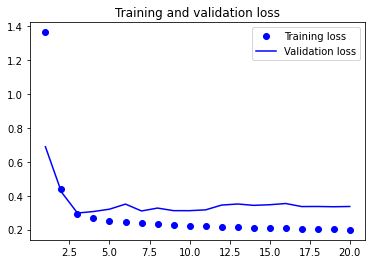

In [75]:
#결과 그래프 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

간단하고 괜찮은 성능 내는 모델(상식 수준의 기준 모델)이 데이터와 타깃 매핑할 수 있다면 훈련한 모델이 이를 찾지 못하고 성능 낮은 이유
- 훈련 과정이 찾는 것은 간단한 모델이 아니기 때문
        복잡한 모델 공간에서 해결책 탐색할 때 간단하고 괜찮은 성능 내는 모델 찾지 못할 수 있음 -> 머신러닝 가진 심각한 제약 사항

#### 6.3.5 첫 번째 순환 신경망

앞의 모델은 시계열 데이터 펼쳤기 때문에 입력 데이터에서 시간 개념을 잃어버림   
인과 관계와 순서가 의미 있는 시퀀스 데이터를 그대로 사용해 보기

GRU 층

        LSTM과 같은 원리로 작동   
        더 간결하고 계산 비용이 덜 듬 (LSTM만큼 표현 학습 능력이 높지 않을 수도 있음)

In [76]:
#GRU를 사용한 모델 훈련하고 평가하기

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data=val_gen,
                             validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 56s 112ms/step - loss: 0.3128 - val_loss: 0.2708
Epoch 2/20
500/500 [==============================] - 57s 115ms/step - loss: 0.2820 - val_loss: 0.2654
Epoch 3/20
500/500 [==============================] - 57s 114ms/step - loss: 0.2761 - val_loss: 0.2646
Epoch 4/20
500/500 [==============================] - 57s 114ms/step - loss: 0.2708 - val_loss: 0.2693
Epoch 5/20
500/500 [==============================] - 57s 114ms/step - loss: 0.2666 - val_loss: 0.2635
Epoch 6/20
500/500 [==============================] - 57s 114ms/step - loss: 0.2611 - val_loss: 0.2653
Epoch 7/20
500/500 [==============================] - 57s 115ms/step - loss: 0.2575 - val_loss: 0.2824
Epoch 8/20
500/500 [==============================] - 58s 116ms/step - loss: 0.2540 - val_loss: 0.2688
Epoch 9/20
500/500 [==============================] - 58s 117ms/step - loss: 0.2481 - val_loss: 0.2702
Epoch 10/20
500/500 [==============================] - 58s 116ms/step - l

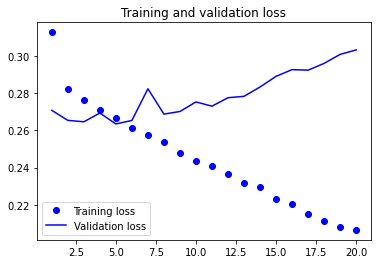

In [77]:
#결과 그래프
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 6.3.6 과대적합을 감소하기 위해 순환 드롭아웃 사용하기

드롭아웃 기법

        훈련 데이터를 층에 주입할 때 데이터에 있는 우연한 상관관계를 깨뜨리기 위해 입력 층의 유닛을 랜덤하게 끄는 기법
        
순환 신경망에 드롭아웃 올바르게 적용하는 방법   

        타임스텝마다 랜덤하게 드롭아웃 마스크 바꾸는 것이 아님   
        동일한 드롭아웃 마스크(동일한 유닛의 드롭 패턴)를 모든 타임스텝에 적용   
        GRU나 LSTM과 같은 순환 게이트에 의해 만들어지는 표현 규제하려면 순환 층 내부 계산에 사용된 활성화 함수에 타임스텝마다 동일한 드롭아웃 마스크 적용해야 함 (순환 드롭 아웃 마스크)   
        
        
케라스에 있는 모든 순환 층은 2개의 드롭아웃 매개변수를 가지고 있음   
- dropout : 층의 입력에 대한 드롭아웃 비율 정하는 부동 소수 값
- recurrent_dropout : 순환 상태의 드롭아웃 비율을 정함
   

In [78]:
#드롭아웃 규제된 GRU를 사용한 모델을 훈련하고 평가하기

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequentialential()
model.add(layers.GRU(32, dropout = 0.2, recurrent_dropout = 0.2,
                    input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mae')

history = model.fit_generator(train_gen,
                             steps_per_epoch = 500,
                             epochs = 40,
                             validation_data = val_gen,
                             validation_steps = val_steps)

Epoch 1/40
500/500 [==============================] - 93s 187ms/step - loss: 0.3250 - val_loss: 0.2779
Epoch 2/40
500/500 [==============================] - 92s 185ms/step - loss: 0.3060 - val_loss: 0.2858
Epoch 3/40
500/500 [==============================] - 91s 182ms/step - loss: 0.2989 - val_loss: 0.2750
Epoch 4/40
500/500 [==============================] - 91s 182ms/step - loss: 0.2922 - val_loss: 0.2697
Epoch 5/40
500/500 [==============================] - 90s 181ms/step - loss: 0.2873 - val_loss: 0.2734
Epoch 6/40
500/500 [==============================] - 92s 183ms/step - loss: 0.2840 - val_loss: 0.2761
Epoch 7/40
500/500 [==============================] - 91s 181ms/step - loss: 0.2792 - val_loss: 0.2736
Epoch 8/40
500/500 [==============================] - 90s 179ms/step - loss: 0.2794 - val_loss: 0.2795
Epoch 9/40
500/500 [==============================] - 89s 179ms/step - loss: 0.2750 - val_loss: 0.2745
Epoch 10/40
500/500 [==============================] - 90s 179ms/step - l

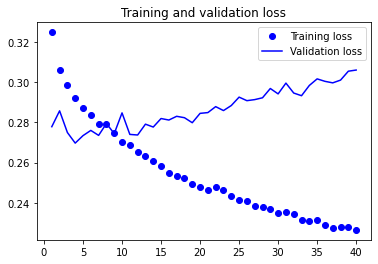

In [79]:
#결과 그래프

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#30번째 에포크까지 과대적합 일어나지 않았음
#평가 점수는 안정적이지만 이전보다 더 나아지지는 않았음

#### 6.3.7 스태킹 순환 층

과대적합은 더 이상 없지만 성능상 병목이 있는 것 같아 네트워크의 용량을 늘려야 함   
과대적합이 일어날 때까지 네트워크의 용량 늘리는 것이 좋음 (드롭아웃 등을 사용해 과대적합 줄이는 기본 단계 거쳤다고 가정)

네트워크 용량 늘리려면
- 층에 있는 유닛의 수 늘림
- 층을 더 많이 추가

순환 층 스태킹 : 더 강력한 순환 네트워크 만드는 고전적인 방법

        ex) 구글 번역 알고리즘의 현재 성능 : 7개의 대규모 LSTM 층을 쌓은 대규모 모델에서 나온 것
        
케라스에서 순환 층 차례로 쌓기 위해서 모든 중간층은 마지막 타임스텝 출력만 아니고 전체 시퀀스(3D 텐서)를 출력해야 함

return_sequences = True 로 지정 가능

In [82]:
#드롭아웃으로 규제하고 스태킹한 GRU 모델을 훈련하고 평가하기

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                    dropout = 0.1,
                    recurrent_dropout = 0.5,
                    return_sequences = True,
                    input_shape = (None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                             steps_per_epoch = 500,
                             epochs = 40,
                             validation_data = val_gen,
                             validation_steps = val_steps)

Epoch 1/40
500/500 [==============================] - 258s 516ms/step - loss: 0.3223 - val_loss: 0.2854
Epoch 2/40
500/500 [==============================] - 254s 509ms/step - loss: 0.3040 - val_loss: 0.2765
Epoch 3/40
500/500 [==============================] - 253s 506ms/step - loss: 0.2935 - val_loss: 0.2708
Epoch 4/40
500/500 [==============================] - 253s 507ms/step - loss: 0.2859 - val_loss: 0.2701
Epoch 5/40
500/500 [==============================] - 253s 505ms/step - loss: 0.2790 - val_loss: 0.2797
Epoch 6/40
500/500 [==============================] - 253s 505ms/step - loss: 0.2758 - val_loss: 0.2727
Epoch 7/40
500/500 [==============================] - 253s 506ms/step - loss: 0.2699 - val_loss: 0.2958
Epoch 8/40
500/500 [==============================] - 252s 504ms/step - loss: 0.2656 - val_loss: 0.2841
Epoch 9/40
500/500 [==============================] - 253s 507ms/step - loss: 0.2622 - val_loss: 0.2821
Epoch 10/40
500/500 [==============================] - 251s 502m

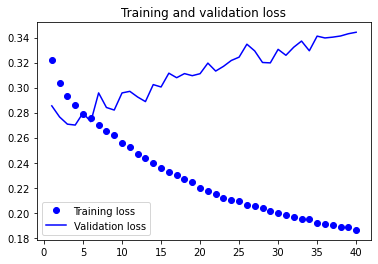

In [83]:
#결과 그래프

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

결론
- 아직 충분히 과대적합 만들지 못했기 때문에 검증 손실 향상하기 위해 층의 크기 늘릴 수 있음 (적지 않은 계산 비용 추가됨)
- 층을 추가한 만큼 도움되지 않아서 네트워크 용량 늘리는 것이 도움이 되지 않는다고 볼 수 있음

#### 6.3.8 양방향 RNN 사용하기

양방향 RNN

        RNN의 한 변종   
        특정 작업에서 기본 RNN보다 훨씬 좋은 성능을 냄 (대표적으로 자연어 처리)   
        RNN이 순서에 민감하다는 성질을 사용함   
        GRU나 LSTM 같은 RNN 2개를 사용   
        각 RNN은 입력 시컨스를 한 방향 (시간 순서나 반대 순서) 으로 처리한 후 각 표현을 합침   
        시퀀스를 양쪽 방향으로 처리해서 단방향 RNN이 놓치기 쉬운 패턴 감지할 수 있음
        
해야할 일: 입력 시퀀스를 시간 차원을 따라 거꾸로 생성하는 데이터 제너레이터 만드는 것 뿐임   
(제너레이터 마지막 줄을 yield samples[:, ::-1, :], targets 로 바꿈

순서 뒤집으면 상식 수준의 기준점보다 성능 낮게 됨

자연어 처리를 포함해 다른 많은 문제에서는 '시간 순서>거꾸로 처리' 가 아님

In [84]:
#거꾸로 된 시퀀스를 사용한 LSTM을 훈련하고 평가하기

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000 #특성으로 사용할 단어의 수
maxlen = 500 #사용할 텍스트의 길이 (가장 빈번한 max_features개의 단어만 사용)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) #데이터 로드

#시퀀스를 뒤집음
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

#시퀀스에 패딩 추가
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['acc'])
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 53s 334ms/step - loss: 0.4806 - acc: 0.7735 - val_loss: 0.3349 - val_acc: 0.8696
Epoch 2/10
157/157 [==============================] - 52s 333ms/step - loss: 0.3178 - acc: 0.8803 - val_loss: 0.4015 - val_acc: 0.8232
Epoch 3/10
157/157 [==============================] - 54s 347ms/step - loss: 0.2540 - acc: 0.9050 - val_loss: 0.3025 - val_acc: 0.8816
Epoch 4/10
157/157 [==============================] - 55s 348ms/step - loss: 0.2201 - acc: 0.9220 - val_loss: 0.3236 - val_acc: 0.8834
Epoch 5/10
157/157 [==============================] - 55s 350ms/step - loss: 0.1945 - acc: 0.9319 - val_loss: 0.3413 - val_acc: 0.8808
Epoch 6/10
157/157 [==============================] - 55s 348ms/step - loss: 0.1763 - acc: 0.9405 - val_loss: 0.3801 - val_acc: 0.8746
Epoch 7/10
157/157 [==============================] - 54s 347ms/step - loss: 0.1548 - acc: 0.9455 - val_loss: 0.4385 - val_acc: 0.8612
Epoch 8/10
157/157 [==============================] - 5

시간 순서로 훈련한 LSTM과 거의 동일한 성능 얻을 수 있음

거꾸로 된 시퀀스에서 훈련한 RNN은 원래 시퀀스에서 훈련한 것과는 다른표현을 학습함   
머신 러닝에서 다른 표현이 유용하다면 항상 사용할 가치가 있음   
이 표현이 데이터 바라보는 새로운 시각 제공, 다른 방식에서는 놓칠 수 있는 데이터의 특징을 잡아냄   

이런 표현은 작업의 성능 올리는 데 도움을 줌 (앙상블 개념)

케라스에서는 Bidirectional 층을 사용해 양방향 RNN을 만듬   
첫 번째 매개 변수로 순환 층의 객체 전달받음   
Bidirectional 클래스는 전달받은 순환 층으로 두 번째 객체를 만듬

In [85]:
#양방향 LSTM을 훈련하고 평가하기

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 74s 473ms/step - loss: 0.5713 - acc: 0.7039 - val_loss: 0.3791 - val_acc: 0.8628
Epoch 2/10
157/157 [==============================] - 70s 446ms/step - loss: 0.3345 - acc: 0.8707 - val_loss: 0.4512 - val_acc: 0.8202
Epoch 3/10
157/157 [==============================] - 69s 438ms/step - loss: 0.2654 - acc: 0.9013 - val_loss: 0.5123 - val_acc: 0.8420
Epoch 4/10
157/157 [==============================] - 69s 439ms/step - loss: 0.2291 - acc: 0.9176 - val_loss: 0.3417 - val_acc: 0.8858
Epoch 5/10
157/157 [==============================] - 69s 440ms/step - loss: 0.2100 - acc: 0.9255 - val_loss: 0.3185 - val_acc: 0.8862
Epoch 6/10
157/157 [==============================] - 69s 440ms/step - loss: 0.1773 - acc: 0.9391 - val_loss: 0.4348 - val_acc: 0.8028
Epoch 7/10
157/157 [==============================] - 69s 440ms/step - loss: 0.1669 - acc: 0.9423 - val_loss: 0.5867 - val_acc: 0.8122
Epoch 8/10
157/157 [==============================] - 7

In [87]:
#양방향 GRU 훈련하기

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape = (None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                             steps_per_epoch = 500,
                             epochs = 40,
                             validation_data = val_gen,
                             validation_steps = val_steps)

#일반 GRU 층과 비슷한 성능을 냄
#모든 예측 성능은 시간 순서대로 처리하는 네트워크의 절반에서 옴
#시간 반대 순서로 처리하는 절반은 이런 작업에 성능이 매우 좋지 않음 (최근 정보가 오래 전 정보보다 훨씬 더 중요함)

Epoch 1/40
500/500 [==============================] - 91s 182ms/step - loss: 0.3015 - val_loss: 0.2766
Epoch 2/40
500/500 [==============================] - 95s 190ms/step - loss: 0.2745 - val_loss: 0.2649
Epoch 3/40
500/500 [==============================] - 95s 191ms/step - loss: 0.2678 - val_loss: 0.2772
Epoch 4/40
500/500 [==============================] - 95s 191ms/step - loss: 0.2624 - val_loss: 0.2694
Epoch 5/40
500/500 [==============================] - 105s 211ms/step - loss: 0.2556 - val_loss: 0.2710
Epoch 6/40
500/500 [==============================] - 106s 211ms/step - loss: 0.2497 - val_loss: 0.2754
Epoch 7/40
500/500 [==============================] - 104s 209ms/step - loss: 0.2438 - val_loss: 0.2802
Epoch 8/40
500/500 [==============================] - 107s 214ms/step - loss: 0.2368 - val_loss: 0.2752
Epoch 9/40
500/500 [==============================] - 104s 209ms/step - loss: 0.2312 - val_loss: 0.2875
Epoch 10/40
500/500 [==============================] - 106s 211ms/st

#### 6.3.9 더 나아가서

온도 예측 문제의 성능 향상 위해 시도해 볼 수 있는 것들
- 스태킹한 각 순환 층의 유닛 수 조정 (지금 설정은 대부분 임의로 한 것이라 최적화가 덜 되었을 것)
- RMSprop 옵티마이저가 사용한 학습률 조정
- GRU 대신 LSTM 층 사용
- 순환 층 위에 용량이 큰 완전 연결된 회귀 층을 사용 (유닛 수가 많은 Dense 층 한 개 또는 여러 개의 Dense 층 스태킹)
- 최종적으로 최선의 모델을 테스트 세트에서 확인해야 함 (이를 잊으면 검증 세트에 과대적합된 네트워크 구조 만들게 될 것)

## 6.4 컨브넷을 사용한 시퀀스 처리

시간을 2D 이미지의 높이와 너비 같은 공간의 차원으로 다룰 수 있음

1D 컨브넷은 특정 시퀀스 처리 문제에서 RNN과 견줄만 함   
일반적으로 계산 비용이 더 쌈   
1D 컨브넷은 전형적으로 팽창된 커널과 함께 사용됨   
최근 오디오 생성, 기계 번역 분야에서 큰 성공을 거둠

<br/>

#### 6.4.1 시퀀스 데이터를 위한 1D 합성곱 이해하기

앞에서 소개한 합성곱 층은 2D 합성곱   
같은 방식으로 시퀀스에서 1D 패치(부분 시퀀스)를 추출해 1D 합성곱을 적용

1D 합성곱 층

        시퀀스에 있는 지역 패턴 인식 가능   
        동일한 변환이 시퀀스에 있는 모든 패치에 적용돼서 특정 위치에서 학습한 패턴을 나중에 다른 위치에서 인식할 수 있음   
        -> 이동 불변성 제공 (시간의 이동에 대한)   
        -> 문자 수준의 1D 컨부넷은 단어 형태학에 관해 학습 가능
        
#### 6.4.2 시퀀스 데이터를 위한 1D 풀링

1D 풀링 연산은 2D 풀링 연산과 동일함 (이미지 텐서의 크기 다운샘플링하기 위해 사용하는 평균 풀링, 맥스 풀링과 같은)

입력에서 1D 패치(부분 시퀀스)를 추출하고 최댓값(최대 풀링)을 출력하거나 평균값(평균 풀링)을 출력   
1D 입력의 길이 줄이기 위해 사용 (서브샘플링)

#### 6.4.3 1D 컨브넷 구현

Conv1D 층을 사용해 구현   
(samples, time, features) 크기의 3D 텐서 입력받고 비슷한 형태의 3D 텐서 반환   
합성곱 윈도우는 시간 축의 1D 윈도우

In [89]:
#IMDB 데이터 전처리하기

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('데이터 로드...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train의 크기: ', x_train.shape)
print('x_test의 크기: ', x_test.shape)

데이터 로드...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train의 크기:  (25000, 500)
x_test의 크기:  (25000, 500)


1D 컨브넷은 2D 컨브넷과 비슷한 방식으로 구성   
Conv1D, MaxPooling1D 층을 쌓고 전역 풀링 층이나 Flatten 층으로 마침   
3D 입력을 2D 출력으로 바꾸므로 분류나 회귀 위해 모델에 하나 이상의 Dense 층 추가 가능

1D 컨브넷에 큰 합성곱 윈도우 사용 가능함

        2D 합성곱 층에서 3x3 합성곱 윈도우는 9 (3x3) 특성을 고려함   
        1D 합성곱 층에서 크기 3인 합성곱 윈도우는 3개의 특성만 고려함

In [90]:
#IMDB 데이터에 1D 컨브넷 훈련하고 평가하기
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

#검증 정확도는 LSTM보다 조금 낮지만 CPU나 GPU에서 더 빠르게 실행됨
#적절한 에포크 수 (4개)로 모델 다시 훈련하고 테스트 세트에서 확인 가능
#단어 수준의 감성 분류 작업에 빠르고 경제적인 1D 컨브넷 사용 가능함을 보여줌

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

#### CNN과 RNN을 연결하여 긴 시퀀스를 처리하기

1D 컨브넷이 입력 패치를 독립적으로 처리해서 RNN과 달리 타임스텝의 순서에 민감하지 않음   
장기간 패턴을 인식하기 위해 많은 합성곱 층과 풀링 층 쌓을 수 있음   
상위 층은 원본 입력에서 긴 범위 보게 될 것이고 이런 방법은 순서 감지하기에 부족함

이 문제는 순서를 감지해야 좋은 예측을 만들어 낼 수 있음

In [91]:
#예나 데이터에서 1D 컨브넷을 훈련하고 평가하기

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation = 'relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
                             steps_per_epoch = 500,
                             epochs=20,
                             validation_data = val_gen,
                             validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 23s 46ms/step - loss: 0.4138 - val_loss: 0.4611
Epoch 2/20
500/500 [==============================] - 23s 45ms/step - loss: 0.3578 - val_loss: 0.4140
Epoch 3/20
500/500 [==============================] - 22s 45ms/step - loss: 0.3286 - val_loss: 0.4189
Epoch 4/20
500/500 [==============================] - 22s 44ms/step - loss: 0.3140 - val_loss: 0.4286
Epoch 5/20
500/500 [==============================] - 22s 45ms/step - loss: 0.3030 - val_loss: 0.4287
Epoch 6/20
500/500 [==============================] - 22s 45ms/step - loss: 0.2943 - val_loss: 0.4344
Epoch 7/20
500/500 [==============================] - 22s 44ms/step - loss: 0.2867 - val_loss: 0.4289
Epoch 8/20
500/500 [==============================] - 22s 44ms/step - loss: 0.2811 - val_loss: 0.4456
Epoch 9/20
500/500 [==============================] - 22s 44ms/step - loss: 0.2751 - val_loss: 0.4330
Epoch 10/20
500/500 [==============================] - 22s 44ms/step - loss: 0.273

검증 MAE는 0.40대에 머물러 있음   
컨브넷이 입력 시계열에 있는 패턴을 보고 이 패턴의 시간 축의 위치를 고려하지 않기 때문

컨브넷의 속도와 경량함을 RNN 순서 감지 능력과 결합하는 전략: 1D 컨브넷을 RNN 이전에 전처리 단계로 사용하는 것

In [92]:
#고밀도 데이터 제너레이터로 예나 데이터셋 준비하기

step = 3 #30분마다 1포인트
lookback = 1440
delay = 144

train_gen = generator(float_data, lookback=lookback, delay = delay, min_index=0, max_index=200000,
                     shuffle=True, step=step)

val_gen = generator(float_data, lookback=lookback, delay = delay, min_index=200001, max_index=300000, step=step)
test_gen = generator(float_data, lookback=lookback, delay = delay, min_index=300001, max_index=None, step=step)

val_steps = (300000-200001-lookback)//128
test_steps = (len(float_data)-300001-lookback)//128
                     

In [93]:
#1D 합성곱과 GRU 층을 연결한 모델
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32,5,activation='relu',input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.GRU(32,dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                             steps_per_epoch=500,
                             epochs=20,
                             validation_data = val_gen,
                             validation_steps = val_steps)


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                6336      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 98s 196ms/step - loss: 0.3331 - val_loss: 0.2890
Epoch 2/20
5

검증 손실로 비교해 보면 이 설정은 규제가 있는 GRU 모델만큼 좋지는 않음   
훨씬 빨라서 데이터를 2배 더 많이 처리할 수 있음!